In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

C:\Users\vaish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\vaish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\vaish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

In [3]:
from tensorflow.keras.preprocessing.image import load_img

img = load_img(r'C:\Users\vaish\VSCODE\image-class-classification\Training\Happy\happy_image5 - Copy.jpg')





In [4]:
i1 = cv2.imread(r'C:\Users\vaish\VSCODE\image-class-classification\Training\Happy\happy_image5 - Copy.jpg')

In [5]:
i1

array([[[229, 219, 225],
        [229, 219, 225],
        [229, 219, 225],
        ...,
        [166, 157, 183],
        [165, 158, 185],
        [166, 159, 186]],

       [[229, 219, 225],
        [229, 219, 225],
        [229, 219, 225],
        ...,
        [166, 157, 183],
        [166, 159, 186],
        [166, 159, 186]],

       [[229, 219, 225],
        [229, 219, 225],
        [229, 219, 225],
        ...,
        [167, 158, 185],
        [166, 159, 186],
        [165, 160, 187]],

       ...,

       [[ 93,  67, 209],
        [ 94,  68, 210],
        [ 94,  68, 210],
        ...,
        [149, 156, 181],
        [147, 154, 179],
        [146, 153, 178]],

       [[ 93,  67, 209],
        [ 93,  67, 209],
        [ 94,  68, 210],
        ...,
        [149, 159, 183],
        [147, 157, 181],
        [146, 156, 180]],

       [[ 93,  67, 209],
        [ 93,  67, 209],
        [ 93,  67, 209],
        ...,
        [150, 160, 184],
        [148, 158, 182],
        [147, 157, 181]]

In [6]:
i1.shape

(5120, 4094, 3)

In [7]:
train = ImageDataGenerator(rescale=1/200)
validation = ImageDataGenerator(rescale=1/200)

In [8]:
train_dataset = train.flow_from_directory(r'C:\Users\vaish\VSCODE\image-class-classification\Training',
                                          target_size=(200,200),
                                          batch_size=32,
                                          class_mode='binary')
validation_dataset = validation.flow_from_directory(r'C:\Users\vaish\VSCODE\image-class-classification\Validation',
                                          target_size=(200,200),
                                          batch_size=32,
                                          class_mode='binary')

Found 11 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'Happy': 0, 'NotHappy': 1}

In [10]:
models = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ]
                                    )

C:\Users\vaish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
models.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [12]:
model_history = models.fit(train_dataset, epochs=15)

C:\Users\vaish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5455 - loss: 0.6857
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step - accuracy: 0.6364 - loss: 5.5014
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - accuracy: 0.3636 - loss: 1.6424
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step - accuracy: 1.0000 - loss: 0.6523
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step - accuracy: 0.7273 - loss: 0.5794
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step - accuracy: 0.7273 - loss: 0.5230
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step - accuracy: 0.7273 - loss: 0.4689
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step - accuracy: 0.9091 - loss: 0.4321
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step - accuracy: 0.7273 - loss: 0.4259
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step - accuracy: 0.7273 - loss: 0.5014
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step - accuracy: 0.7273 - loss: 0.3810
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step - accuracy: 1.0000 - loss:

In [13]:
dir_path = (r'C:\Users\vaish\VSCODE\image-class-classification\Testing')
for i in os.listdir(dir_path):
  print(i)

happy_image6 - Copy.jpg
happy_image7 - Copy.jpg
sad_image2.jpg
sad_image4.jpeg


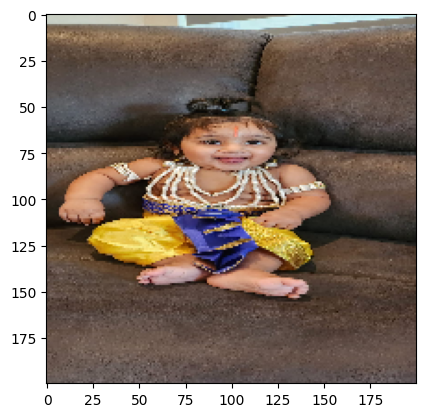

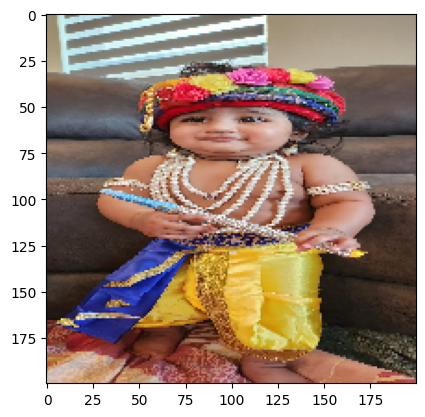

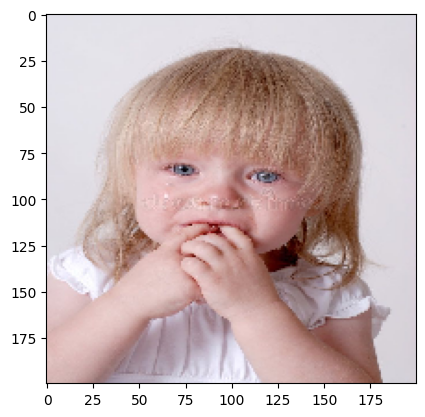

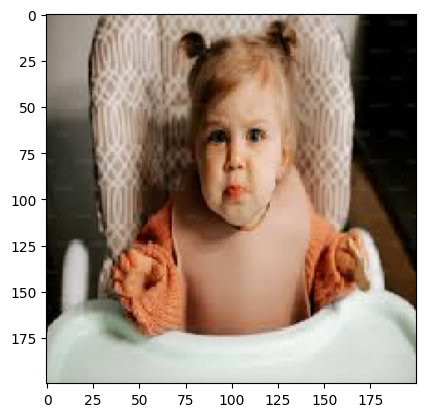

In [14]:
dir_path = (r'C:\Users\vaish\VSCODE\image-class-classification\Testing')

for i in os.listdir(dir_path):
  img = load_img(dir_path+'//'+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

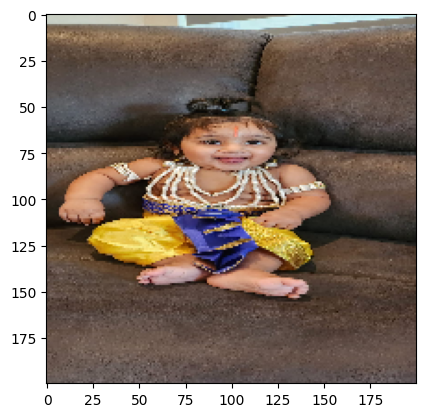

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Prediction value: [[0.]]
i am happy


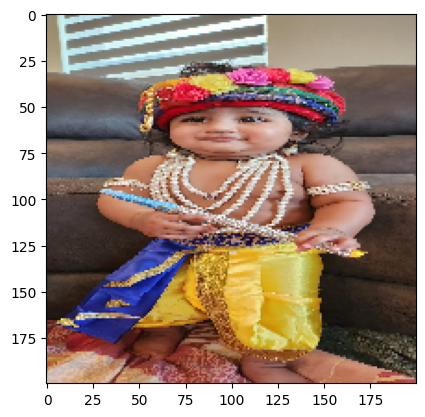

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction value: [[0.]]
i am happy


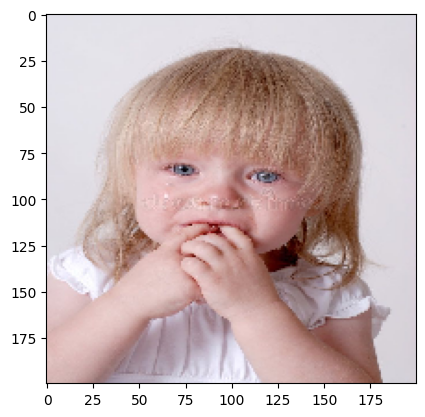

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Prediction value: [[1.]]
i am not happy


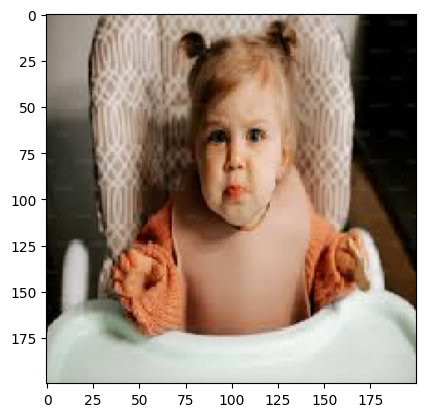

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Prediction value: [[1.]]
i am not happy


In [15]:
dir_path = (r'C:\Users\vaish\VSCODE\image-class-classification\Testing') # Assign the directory path

for i in os.listdir(dir_path):
  img = load_img(dir_path+'//'+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

  x=img_to_array(img) # Call img_to_array directly
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  val=models.predict(images) # Use the correct model variable
  print(f"Prediction value: {val}") # Print the prediction value
  if val==0:
    print('i am happy')
  else:
    print('i am not happy')

In [16]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(models, file)
